**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

In [94]:
%matplotlib inline

import numpy as np
import pandas as pd

import time
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



#### Execute the below cell to load the datasets

In [95]:
#Loading data
books = pd.read_csv("books/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('books/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [96]:
books.shape

(271360, 8)

In [97]:
users.shape

(278858, 3)

In [98]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [99]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [100]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace=True)

In [101]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [102]:
books.yearOfPublication.unique()
uYrs = books['yearOfPublication'].unique()
uYrs

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [103]:
books.loc[books['yearOfPublication'].isin(['DK Publishing Inc', 'Gallimard']) == True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [104]:
books = books.loc[books['yearOfPublication'].isin(['DK Publishing Inc', 'Gallimard']) == False]
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [105]:
books['yearOfPublication'] = books.yearOfPublication.astype('int32')

In [106]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [107]:
books = books[books.publisher.isna() == False]
books.shape

(271355, 5)

## Exploring Users dataset

In [108]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [109]:
uniAge = sorted(users.Age.unique())
uniAge

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [110]:
users[(users['Age'] < 5) | (users['Age'] > 90)] = None
# users[(users['Age'] >= 5) | (users['Age'] <= 90)]
users.loc[users.Age.isna()]

,userID,Location,Age
0,1.0,"nyc, new york, usa",NaN
2,3.0,"moscow, yukon territory, russia",NaN
4,5.0,"farnborough, hants, united kingdom",NaN
6,7.0,"washington, dc, usa",NaN
7,8.0,"timmins, ontario, canada",NaN
8,9.0,"germantown, tennessee, usa",NaN
11,12.0,"fort bragg, california, usa",NaN
13,14.0,"mediapolis, iowa, usa",NaN
14,15.0,"calgary, alberta, canada",NaN
15,16.0,"albuquerque, new mexico, usa",NaN


### Replace null values in column `Age` with mean

In [111]:
users[(users['Age'] >= 5) | (users['Age'] <= 90)]
age_array = users[users["Age"] != None]["Age"]

users["Age"].fillna(age_array.mean(), inplace = True)
users.loc[users.Age.isna()]

,userID,Location,Age


### Change the datatype of `Age` to `int`

In [112]:
users['Age'] = users.Age.astype('int32')

In [113]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [114]:
ratings.shape

(1149780, 3)

In [115]:
n_users = users.shape[0]
n_books = books.shape[0]
print (n_users, n_books)

278858 271355


In [116]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [117]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [118]:
ratings = ratings.loc[ratings['ISBN'].isin(books['ISBN'])]
ratings.shape

(1031130, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [119]:
ratings = ratings.loc[ratings['userID'].isin(users['userID'])]
ratings.shape

(1026151, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [120]:
ratings.head()
ratings = ratings.loc[(ratings['bookRating'] >=1) & (ratings['bookRating'] <= 10)]
# ratings.loc[(ratings['bookRating'] == 8)]

### Find out which rating has been given highest number of times

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28885f60>]],
      dtype=object)

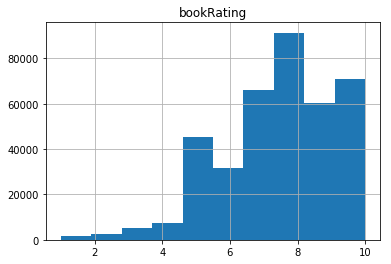

In [121]:
import  matplotlib.pyplot as plot
ratings.hist(column = 'bookRating', bins = 10)

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [122]:
userRatings = ratings.groupby('userID').sum()
userRatings.head()
user100 = userRatings.loc[userRatings['bookRating'] >= 100]
# user100.index
# print(sorted(ratings.userID.unique()))
# print(sorted(user100.userID.unique()))

ratings = ratings.loc[ratings['userID'].isin(user100.index)]
# usrRtCnt.sum()
# ratings.head(20)
# user100.head(5)
ratings.head(30)

,userID,ISBN,bookRating
133,276822,0060096195,10
134,276822,0141310340,9
135,276822,0142302198,10
136,276822,0156006065,9
137,276822,0375821813,9
138,276822,038076041X,10
140,276822,0439401399,6
142,276822,0689804458,8
144,276822,0786812508,9
145,276822,0786817070,10


In [123]:
# Show the most popular books in the dataset

book_grouped = ratings.groupby(['ISBN']).agg({'bookRating': 'count'}).reset_index()
grouped_sum = book_grouped['bookRating'].sum()
book_grouped['percentage']  = book_grouped['bookRating'].div(grouped_sum)*100
book_grouped.sort_values(['bookRating', 'ISBN'], ascending = [0,1])

,ISBN,bookRating,percentage
17239,0316666343,295,0.122917
31267,0385504209,240,0.100000
14045,0312195516,173,0.072084
55748,059035342X,167,0.069584
9612,0142001740,156,0.065000
37358,043935806X,149,0.062084
93758,0971880107,149,0.062084
41830,0446672211,144,0.060000
3232,0060928336,142,0.059167
19116,0345337662,142,0.059167


### Generating ratings matrix from explicit ratings


In [124]:
trainDF, testDF = train_test_split(ratings, test_size = 0.20)
tempDF = testDF.copy()
tempDF.bookRating = np.nan

# tempDF.head()
print(trainDF.head(5))

         userID        ISBN  bookRating
1066942  254899  0060268506           5
51491     11676  0553250515           5
491737   117384  0842329242          10
1008332  242037  0312979479           7
597904   144255  0316779423           8


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [125]:
uniUsers = train_data['userID'].unique()
len(uniUsers)

5317

In [126]:
uniBooks = train_data['ISBN'].unique()
len(uniBooks)

117291

In [127]:
print(train_data.head(5))

        userID        ISBN  bookRating
837455  202462  044021145X          10
785515  189835  1560600543           9
70398    14643  0553297988           7
428391  102359  0133571114          10
566652  136071  0399147101          10


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [164]:
# intISBN = ratings[pd.to_numeric(ratings.ISBN, errors='coerce').isnull()]
# ratings.head(30)
# ratings.dtypes

# ISBN = ratings['ISBN'];
# ISBN
# bookID = map(int, ISBN)

# bookID = ratings['ISBN'].apply(lambda x: pd.factorize(x)[0] + 1)
ratingsInt = ratings.assign(bookID=(ratings['ISBN'].astype('category').cat.codes))
ratingsInt.head()

#ratings = ratings.drop(['bookID'], axis=1)
# ratings['bookID'] = bookI
# print (ratings[pd.to_numeric(ratings.ISBN, errors='coerce').isnull()])

,userID,ISBN,bookRating,bookID
133,276822,0060096195,10,1354
134,276822,0141310340,9,9486
135,276822,0142302198,10,9726
136,276822,0156006065,9,10336
137,276822,0375821813,9,27304


In [165]:
# We want the format of ratings matrix to be one row per user and one column per movie. 
# we can pivot ratings_df to get that and call the new variable R_df.
R_df = ratingsInt.pivot(index = 'userID', columns ='bookID', values = 'bookRating').fillna(0)
R_df.shape

(4758, 114671)

In [166]:
R_df.head(2)

bookID,0,1,2,3,4,5,6,7,8,9,...,114661,114662,114663,114664,114665,114666,114667,114668,114669,114670
userID,,,,,,,,,,,,,,,,,,,,,
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
from scipy.sparse.linalg import svds
U, sig, Vt = svds(R_df, k = 50)

In [168]:
sig.shape

(50,)

In [170]:
### For some reason the Sigma Matrix is not coming as (50, 50) shape, which is expected.
### Without that all the following working on Popularity Based Ranking and Person specific ranking results will not come.
### Will keep throwing error due to dimension.

### Not sure if it is my laptop's limitation & some memory-space overflow or likes happening internally or not. No error message.
### Every calculation is taking very long on my laptop

In [158]:
# Diagonal
sig = np.diag(sig)
sig

array([152.7824689 , 153.8862203 , 154.18662358, 155.73554331,
       157.37699402, 158.93868659, 160.79659448, 161.68630594,
       161.99629937, 164.04210598, 164.99636225, 165.78444536,
       167.37782052, 168.74399817, 169.87492725, 171.76551019,
       172.33691869, 174.02010431, 175.26390656, 176.44090768,
       180.03721889, 181.28460284, 182.39461688, 183.46373106,
       186.52044431, 187.69767003, 190.35514949, 193.36483629,
       195.55380099, 198.35442189, 201.72596826, 202.1672196 ,
       202.90524771, 208.76909512, 211.48853122, 215.64031709,
       217.06688539, 221.94461219, 225.20436461, 232.86398461,
       237.13464312, 251.34167711, 255.34866129, 264.8262271 ,
       279.5951601 , 291.52435146, 302.31953654, 381.40796185,
       636.95538407, 681.30849163])

In [159]:
# U.shape
# Vt.shape
sig.shape

(50,)

In [160]:
# I also need to add the user means back to get the predicted 5-star ratings
all_user_predicted_ratings = np.dot(np.dot(U, sig), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

ValueError: shapes (4758,) and (50,114671) not aligned: 4758 (dim 0) != 50 (dim 0)

In [172]:
preds_df.head()

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [2]:
userID = 2110

In [3]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [ ]:
# return the movies with the highest predicted rating that the specified user hasn’t already rated
# Take specific user row from matrix from predictions
def recommend_movies(predictions_df, userID, books, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID # UserID is used as index
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    #Added title and genres
    user_full = (user_data.merge(books, how = 'left', left_on = 'bookID', right_on = 'bookID').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} books.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings books not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (books[~books['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'bookID',
               right_on = 'bookID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations, sorted_user_predictions, user_data, user_full

already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(preds_df, 2110, movies, ratings, 10)

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [ ]:
# dataframe for the specific user
sorted_user_predictions

In [67]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [68]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [ ]:
user_full_info = pd.merge(ratings, books, how='inner', on = 'bookID')

In [70]:
book_data.shape

(103, 5)

In [71]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [73]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [ ]:
user_full_info.head(10)